In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

the proejct period was 10 days only so I worked hard to deliver this accuracy for the models
the data obtained from the company was cleaned on microsoft excel firstly without deleting the outliers and the reason for that is i made 16 total trials for 4 projects on the same data set and each trial was with different features selected to enhance the accuracy of the model. also i used python to delete the outliers from the features selected only without saving these changes to keep the original cleaned data for further trials.

cleaning involved: 
-------------------
1- checking fon non logical values like negative percent values, scientifically non logical values because data science isn't only about using tools only it's about using your brain and your chemical engineering background aided with text books to know which values are logical and which values aren't.

2- checking for duplicates and removing them ( no duplicates were found )

3- checking for ref errors and dealing with them

4-checking for bland cells and removing them as we don't want to fill the blanks with any sort of method to keep the accuracy of the model high or as near as real life

In [2]:
df = pd.read_excel("D:\internship data\intern data.xlsx" , sheet_name = "cleaned data" )

In [3]:
df

,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,Initial,Final,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff
0,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.40,0.29,0.04,...,170,265,21.3,46.5,3290,18.3,2.7,1.22,20.801055,0.498945
1,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.40,0.30,0.04,...,160,265,21.3,45.9,3320,20.5,4.1,1.35,21.119374,0.180626
2,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,165,265,20.5,46.4,3290,18.7,3.2,1.40,20.205139,0.294861
3,"CEM I 42,5 N",18.88,4.41,3.54,61.84,2.80,3.16,0.43,0.31,0.04,...,170,265,21.9,47.3,3340,18.7,3.5,1.30,20.792741,1.107259
4,"CEM I 42,5 N",19.22,4.25,3.74,61.65,2.83,3.02,0.41,0.28,0.04,...,160,270,22.0,46.3,3160,19.5,3.5,1.64,20.284507,1.715493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,"CEM I 42,5 N",20.52,4.39,4.69,59.68,3.57,3.00,0.30,0.23,0.04,...,170,235,21.6,48.6,3710,19.8,4.2,NaN,19.184548,2.415452
1447,"CEM I 42,5 N",20.41,4.36,4.67,59.73,3.51,3.52,0.30,0.23,0.04,...,175,245,19.5,47.1,3570,17.6,3.8,NaN,19.601347,0.101347
1448,"CEM I 42,5 N",20.56,4.38,4.68,59.85,3.90,3.06,0.31,0.24,0.04,...,165,240,22.6,48.3,3210,21.9,4.1,NaN,19.656448,2.943552
1449,"CEM I 42,5 N",21.86,6.38,4.14,55.71,4.07,3.46,0.34,0.21,0.04,...,175,260,21.7,47.5,3720,16.3,3.3,NaN,23.724581,2.024581


In [4]:
df.columns

Index(['Class', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'SO3', 'K2O', 'Na2O',
       'Cl', 'LOI', 'IR.', 'CaOfree', 'A.Eq', 'Total', 'LSF', 'SM', 'AM',
       'C3S', 'C2S', 'C3A', 'C4AF', '%', 'Initial', 'Final', '2 d', '28 d',
       'Blaine', '45 m R', '90 m R', 'Cao_free', 'Unnamed: 31', 'diff'],
      dtype='object')

In [5]:
x_train_2days = df[["C3A" , "45 m R" , "A.Eq",  "LOI" , "C2S"]]
x_train_28days = df[["C3A" , "45 m R" , "A.Eq",  "LOI" , "C3S"]]
y_train_2days = df['2 d']
y_train_28days = df['28 d']

visualizing the final features selected to know the relationship and delete the outliers

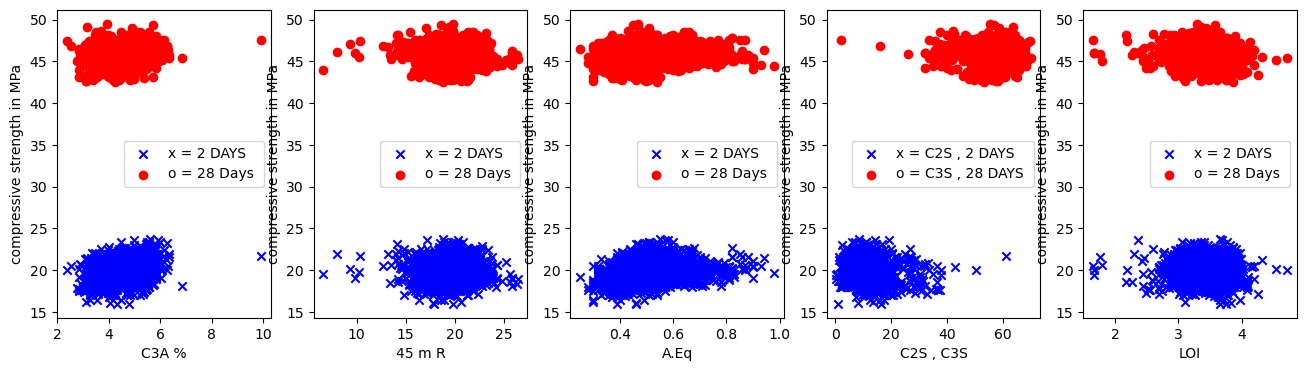

In [6]:
fig , ax = plt.subplots(1 , 5 , figsize = (16 ,4))

ax[0].scatter(x_train_2days["C3A"] , y_train_2days, marker = "x" , c = "b" , label = "x = 2 DAYS")
ax[0].scatter(x_train_28days["C3A"] , y_train_28days, marker = "o" , c = "r" , label = "o = 28 Days ")
ax[0].set_xlabel("C3A %")
ax[0].set_ylabel("compressive strength in MPa")
ax[0].legend()

ax[1].scatter(x_train_2days["45 m R"] , y_train_2days, marker = "x" , c = "b" , label = "x = 2 DAYS")
ax[1].scatter(x_train_28days["45 m R"] , y_train_28days, marker = "o" , c = "r" , label = "o = 28 Days ")
ax[1].set_xlabel("45 m R")
ax[1].set_ylabel("compressive strength in MPa")
ax[1].legend()

ax[2].scatter(x_train_2days["A.Eq"] , y_train_2days, marker = "x" , c = "b" , label = "x = 2 DAYS")
ax[2].scatter(x_train_28days["A.Eq"] , y_train_28days, marker = "o" , c = "r" , label = "o = 28 Days ")
ax[2].set_xlabel("A.Eq")
ax[2].set_ylabel("compressive strength in MPa")
ax[2].legend()

ax[3].scatter(x_train_2days["C2S"] , y_train_2days, marker = "x" , c = "b" , label = "x = C2S , 2 DAYS")
ax[3].scatter(x_train_28days["C3S"] , y_train_28days, marker = "o" , c = "r" , label = "o = C3S , 28 DAYS ")
ax[3].set_xlabel("C2S , C3S")
ax[3].set_ylabel("compressive strength in MPa")
ax[3].legend()

ax[4].scatter(x_train_2days["LOI"] , y_train_2days, marker = "x" , c = "b" , label = "x = 2 DAYS")
ax[4].scatter(x_train_28days["LOI"] , y_train_28days, marker = "o" , c = "r" , label = "o = 28 Days ")
ax[4].set_xlabel("LOI")
ax[4].set_ylabel("compressive strength in MPa")
ax[4].legend()

deleting the outliers with boxplot method

<Axes: xlabel='A.Eq'>

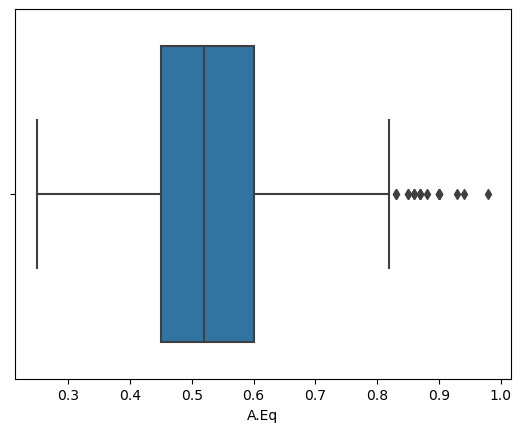

In [7]:
sns.boxplot(x=df["A.Eq"])

In [8]:
df1 = df[df["A.Eq"]<0.8]


<Axes: xlabel='A.Eq'>

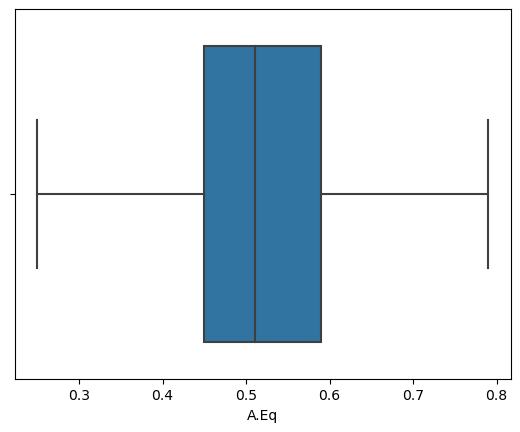

In [9]:
sns.boxplot(x=df1["A.Eq"])

<Axes: xlabel='45 m R'>

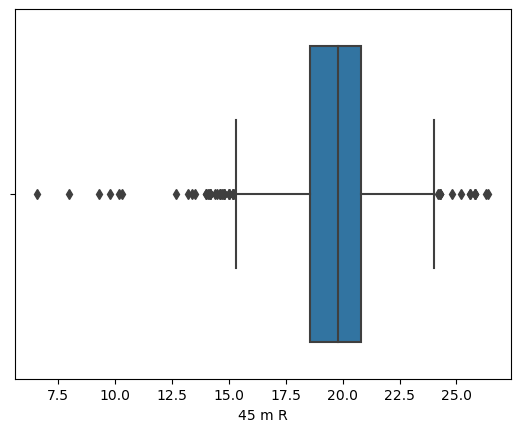

In [10]:
sns.boxplot(x=df1["45 m R"])

In [11]:
df1 =df1[df1["45 m R"]> 16 ]
df1 =df1[df1["45 m R"]<23 ]

<Axes: xlabel='45 m R'>

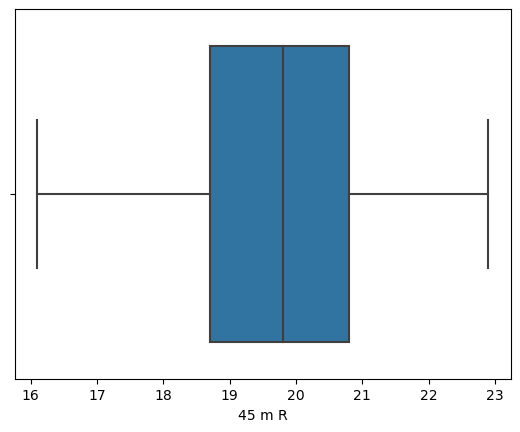

In [12]:
sns.boxplot(x=df1["45 m R"])

<Axes: xlabel='C3A'>

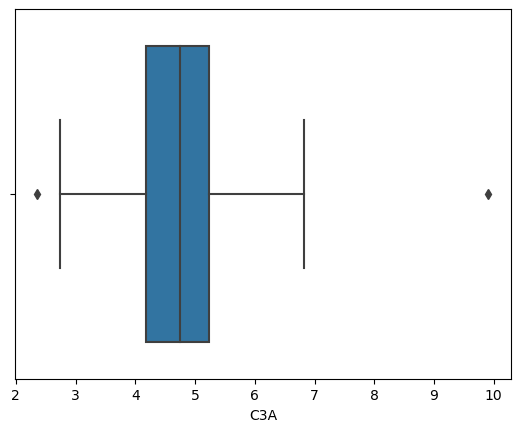

In [13]:
sns.boxplot(x = df1["C3A"])

In [14]:
df1 =df1[df1["C3A"]>2.5]
df1 =df1[df1["C3A"]<9.7]

<Axes: xlabel='C3A'>

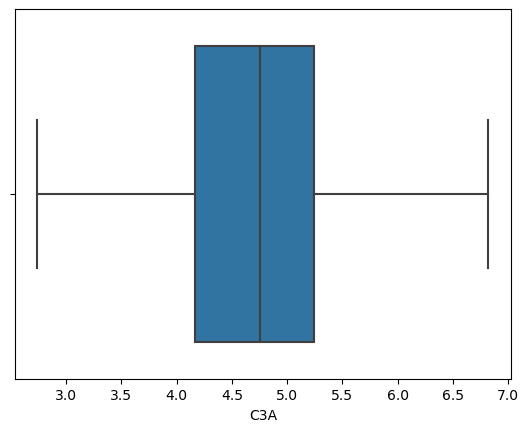

In [15]:
sns.boxplot(x = df1["C3A"])

<Axes: xlabel='LOI'>

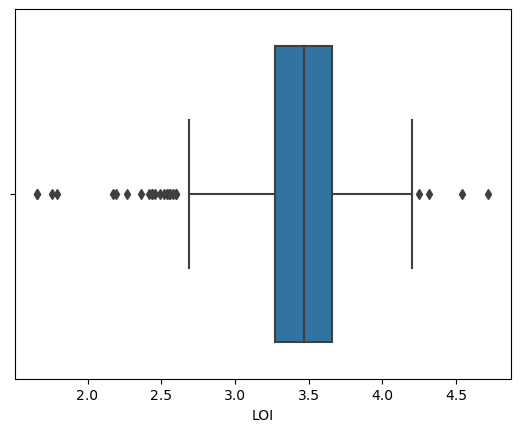

In [16]:
sns.boxplot(x = df1["LOI"])

In [17]:
df1 =df1[df1["LOI"]>2.7]
df1 =df1[df1["LOI"]<4.25]

<Axes: xlabel='LOI'>

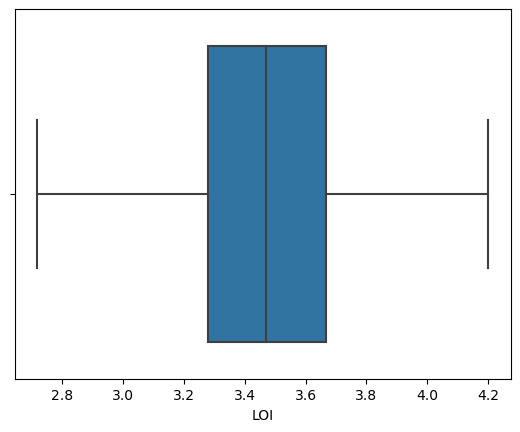

In [18]:
sns.boxplot(x = df1["LOI"])

In [19]:
#sns.boxplot(x = df1["C3S"])

In [20]:
#df1 =df1[df1["C3S"]>52]
#df1 =df1[df1["C3S"]<69]

In [21]:
#sns.boxplot(x = df1["C3S"])

<Axes: xlabel='C2S'>

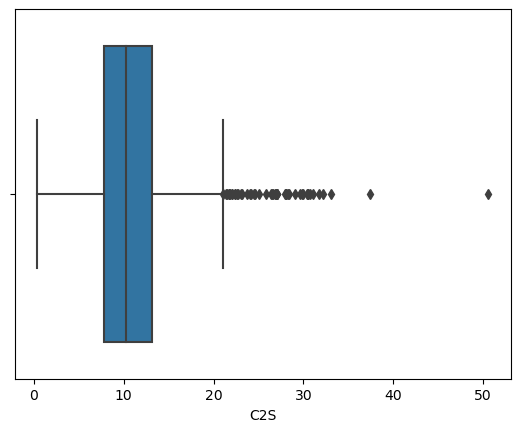

In [22]:
sns.boxplot(x = df1["C2S"])

In [23]:
df1 =df1[df1["C2S"]<20]

<Axes: xlabel='C2S'>

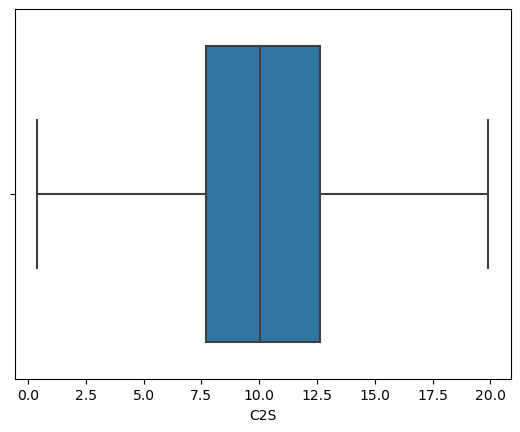

In [24]:
sns.boxplot(x = df1["C2S"])

In [25]:
df1

,Class,SiO2,Al2O3,Fe2O3,CaO,MgO,SO3,K2O,Na2O,Cl,...,Initial,Final,2 d,28 d,Blaine,45 m R,90 m R,Cao_free,Unnamed: 31,diff
0,"CEM I 42,5 N",19.43,4.38,3.59,61.77,2.84,3.29,0.40,0.29,0.04,...,170,265,21.3,46.5,3290,18.3,2.7,1.22,20.801055,0.498945
1,"CEM I 42,5 N",19.49,4.62,3.57,61.93,2.89,3.03,0.40,0.30,0.04,...,160,265,21.3,45.9,3320,20.5,4.1,1.35,21.119374,0.180626
2,"CEM I 42,5 N",19.69,4.29,4.06,60.93,2.66,3.19,0.35,0.28,0.04,...,165,265,20.5,46.4,3290,18.7,3.2,1.40,20.205139,0.294861
3,"CEM I 42,5 N",18.88,4.41,3.54,61.84,2.80,3.16,0.43,0.31,0.04,...,170,265,21.9,47.3,3340,18.7,3.5,1.30,20.792741,1.107259
4,"CEM I 42,5 N",19.22,4.25,3.74,61.65,2.83,3.02,0.41,0.28,0.04,...,160,270,22.0,46.3,3160,19.5,3.5,1.64,20.284507,1.715493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,"CEM I 42,5 N",19.32,4.00,4.07,60.76,3.41,2.97,0.37,0.24,0.04,...,160,250,20.0,46.3,3100,20.2,5.2,NaN,18.978398,1.021602
1411,"CEM I 42,5 N",19.46,4.15,3.98,61.04,3.42,3.13,0.36,0.23,0.04,...,150,245,21.4,47.5,3240,21.1,3.2,NaN,19.413181,1.986819
1413,"CEM I 42,5 N",19.81,4.27,4.25,60.43,3.66,3.44,0.30,0.23,0.04,...,150,265,18.8,45.6,3210,21.5,3.2,NaN,19.352669,0.552669
1414,"CEM I 42,5 N",19.84,3.93,4.21,61.61,3.40,2.91,0.34,0.48,0.04,...,150,255,20.4,46.2,3310,18.7,2.8,NaN,18.935935,1.464065


In [26]:
x_train_2days = df1[["C3A" , "45 m R" , "A.Eq",  "LOI"  , "C3S"]]
x_train_28days = df1[["C3A" , "45 m R" , "A.Eq",  "LOI" , "C2S" ]]
y_train_2days = df1['2 d']
y_train_28days = df1['28 d']

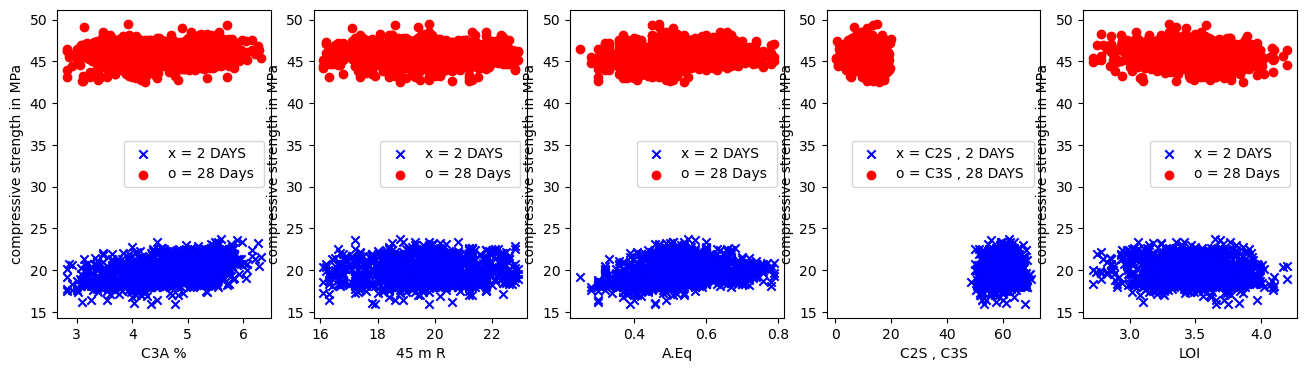

In [27]:
fig , ax = plt.subplots(1 , 5 , figsize = (16 ,4))

ax[0].scatter(x_train_2days["C3A"] , y_train_2days, marker = "x" , c = "b" , label = "x = 2 DAYS")
ax[0].scatter(x_train_28days["C3A"] , y_train_28days, marker = "o" , c = "r" , label = "o = 28 Days ")
ax[0].set_xlabel("C3A %")
ax[0].set_ylabel("compressive strength in MPa")
ax[0].legend()

ax[1].scatter(x_train_2days["45 m R"] , y_train_2days, marker = "x" , c = "b" , label = "x = 2 DAYS")
ax[1].scatter(x_train_28days["45 m R"] , y_train_28days, marker = "o" , c = "r" , label = "o = 28 Days ")
ax[1].set_xlabel("45 m R")
ax[1].set_ylabel("compressive strength in MPa")
ax[1].legend()

ax[2].scatter(x_train_2days["A.Eq"] , y_train_2days, marker = "x" , c = "b" , label = "x = 2 DAYS")
ax[2].scatter(x_train_28days["A.Eq"] , y_train_28days, marker = "o" , c = "r" , label = "o = 28 Days ")
ax[2].set_xlabel("A.Eq")
ax[2].set_ylabel("compressive strength in MPa")
ax[2].legend()

ax[3].scatter(x_train_2days["C3S"] , y_train_2days, marker = "x" , c = "b" , label = "x = C2S , 2 DAYS")
ax[3].scatter(x_train_28days["C2S"] , y_train_28days, marker = "o" , c = "r" , label = "o = C3S , 28 DAYS ")
ax[3].set_xlabel("C2S , C3S")
ax[3].set_ylabel("compressive strength in MPa")
ax[3].legend()

ax[4].scatter(x_train_2days["LOI"] , y_train_2days, marker = "x" , c = "b" , label = "x = 2 DAYS")
ax[4].scatter(x_train_28days["LOI"] , y_train_28days, marker = "o" , c = "r" , label = "o = 28 Days ")
ax[4].set_xlabel("LOI")
ax[4].set_ylabel("compressive strength in MPa")
ax[4].legend()

In [28]:
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
x_train_2days = df1[["C3A" , "45 m R" , "A.Eq",  "LOI"  , "C3S"]]
x_train_28days = df1[["C3A" , "45 m R" , "A.Eq",  "LOI" , "C2S"]]
y_train_2days = df1['2 d']
y_train_28days = df1['28 d']

In [30]:
# Convert 1-D arrays into 2-D because the commands later will require it

y = np.expand_dims(y_train_2days, axis=1)


print(f"the shape of the targets y is: {y.shape}")

the shape of the targets y is: (1207, 1)


In [31]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x_train_2days, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (724, 5)
the shape of the training set (target) is: (724, 1)

the shape of the cross validation set (input) is: (241, 5)
the shape of the cross validation set (target) is: (241, 1)

the shape of the test set (input) is: (242, 5)
the shape of the test set (target) is: (242, 1)


In [32]:
# Initialize the class
#scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
#X_train_scaled = scaler_linear.fit_transform(x_train)

In [33]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

LinearRegression()

In [34]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 0.7648915912334621
training MSE (for-loop implementation): 0.7648915912334625


In [35]:
# Scale the cross validation set using the mean and standard deviation of the training set
#X_cv_scaled = scaler_linear.transform(x_cv)

#print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
#print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(x_cv)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 0.7101128994460584


In [36]:
y_test_predicted = linear_model.predict(x_test)

In [37]:
b = linear_model.intercept_
w = linear_model.coef_
print( b , w)

[17.66540925] [[ 0.73689903 -0.09395889  1.1448579  -0.84504989  0.05168017]]


In [42]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

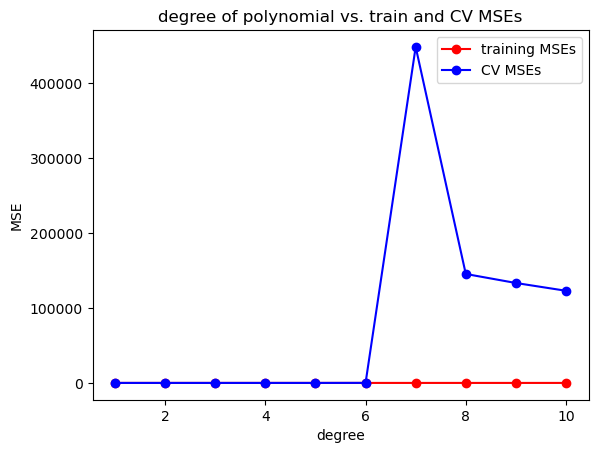

In [43]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [44]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=2


x_train_2days = df1[["C3S" , "C2S" , "Blaine" , "SO3" , "LOI"]]

y_train_2days = df1['2 d']

In [46]:
# Convert 1-D arrays into 2-D because the commands later will require it

y = np.expand_dims(y_train_28days, axis=1)


print(f"the shape of the targets y is: {y.shape}")

the shape of the targets y is: (1207, 1)


In [47]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x_train_28days, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (724, 5)
the shape of the training set (target) is: (724, 1)

the shape of the cross validation set (input) is: (241, 5)
the shape of the cross validation set (target) is: (241, 1)

the shape of the test set (input) is: (242, 5)
the shape of the test set (target) is: (242, 1)


In [48]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

LinearRegression()

In [49]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 0.5039935627072131
training MSE (for-loop implementation): 0.5039935627072133


In [50]:
# Scale the cross validation set using the mean and standard deviation of the training set
#X_cv_scaled = scaler_linear.transform(x_cv)

#print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
#print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(x_cv)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 0.5186107441394645


In [51]:
y_test_predicted = linear_model.predict(x_test)

In [52]:
b = linear_model.intercept_
w = linear_model.coef_
print( b , w)

[49.02599566] [[ 0.14181842 -0.06374949  0.20833209 -0.69708686 -0.03782107]]


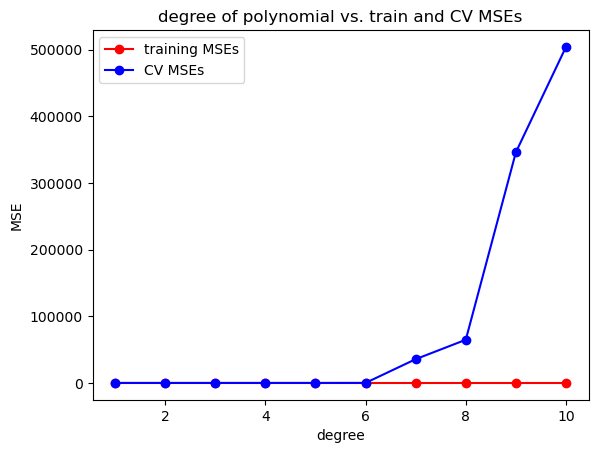

In [54]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    #scaler_poly = StandardScaler()
    #X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    #scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    #X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [55]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=2


at the end we didn't select the 2nd degree but first degree as the data wasn't enough to select and determine that the 2nd degree is good enough to describe the data taking into consideration the trials made were an indicator to discover what's good and what's not 

the following figure describes the distribution of errors from the model trying out and testing our model with raw data and unlcleaned and it achieved a big accuracy for 28 days strength model

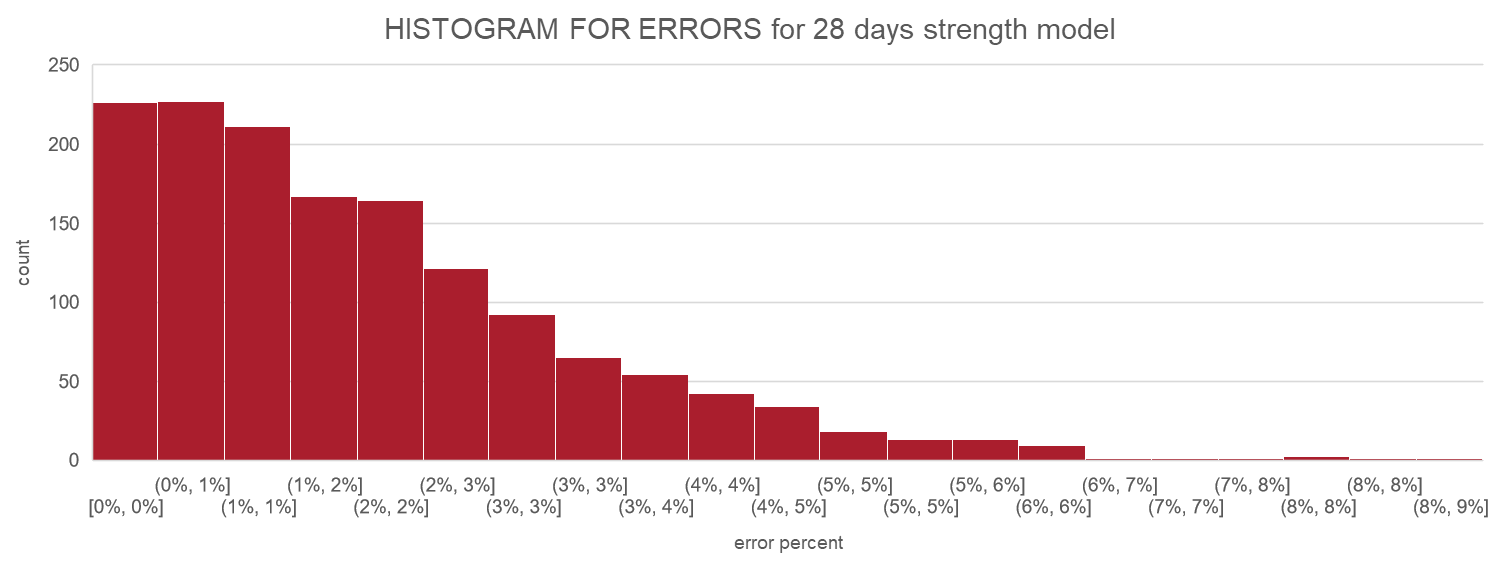

and here's our trials for this model selecting the last one as it achieves better accuracy for different data points

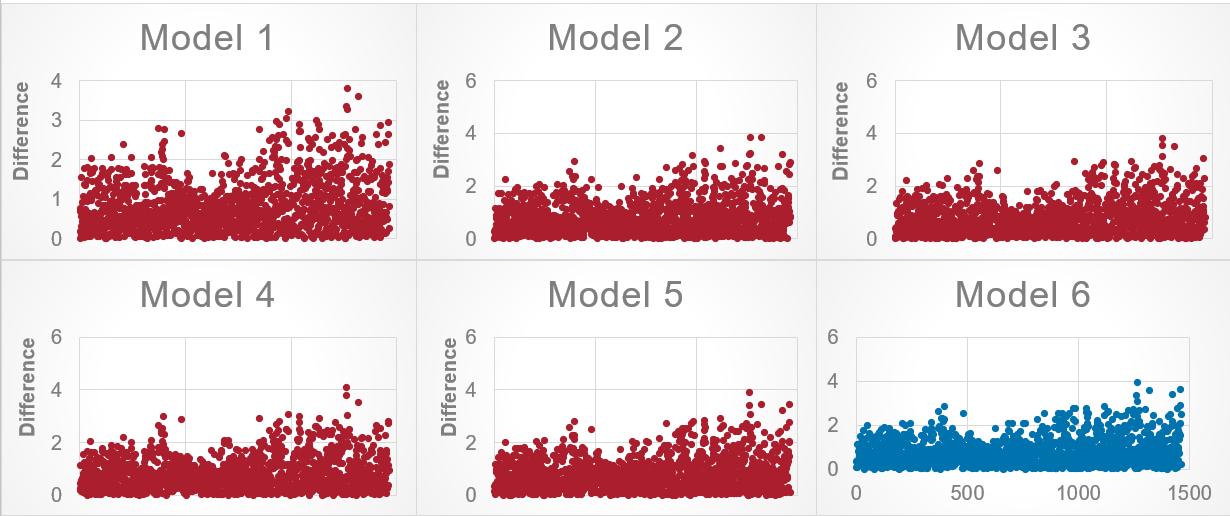

for 2 days strength model accuracy

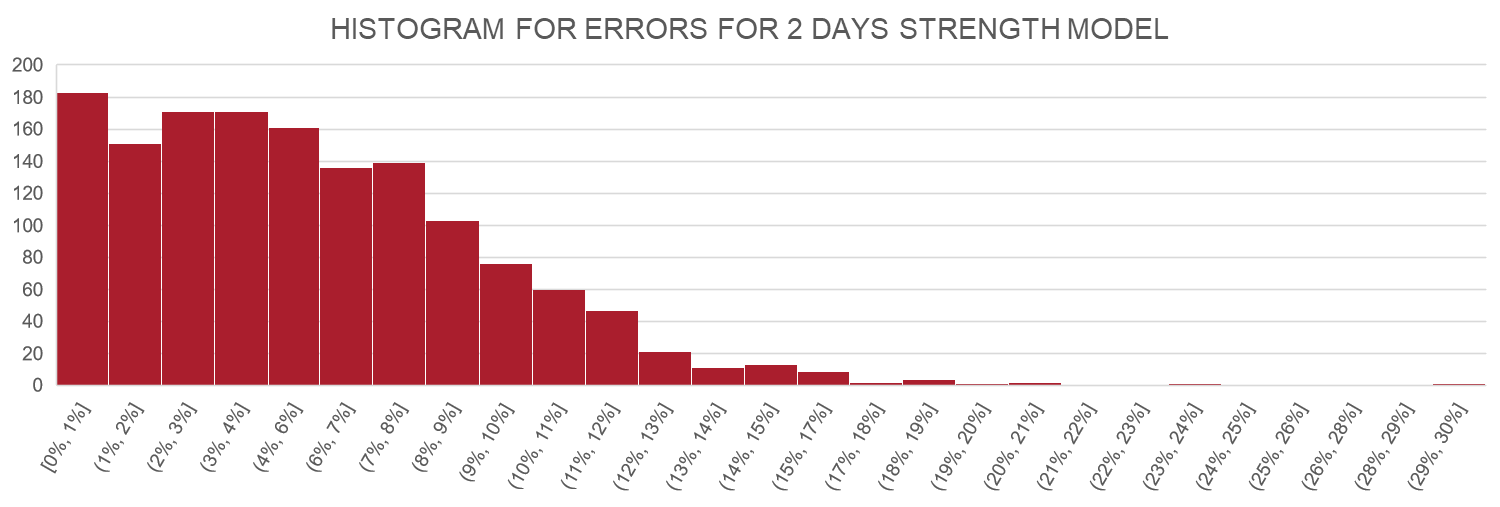

FOR 2 DAYS STRENGTH
The 3rd model achieved the best accuracy between them all 

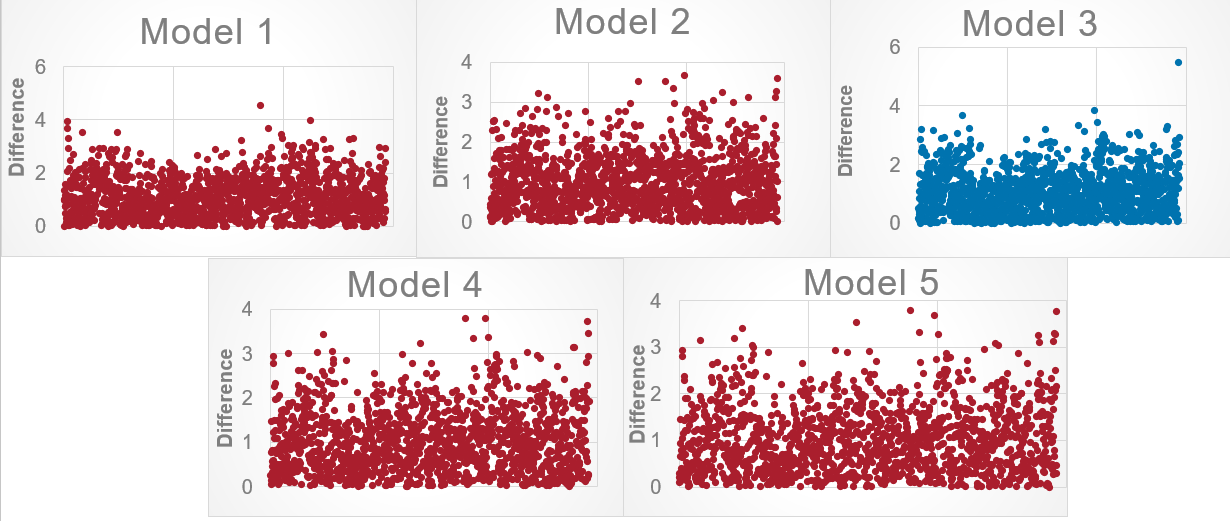

now it's time to show you numerically the accuracy:
the white column is predicted values from our model and the yellow ones are the real values from the lab

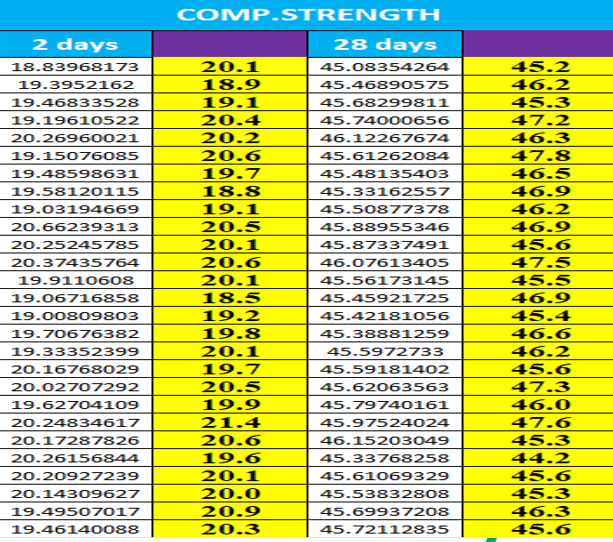